In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
dados = pd.read_csv('dados/moradias.csv')
dados.head()

,idade,tamanho_sala,tamanho_quarto,populacao,familias,renda_media,valor_medio_das_casas,proximidade_do_mar
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Proximo da Baía
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Proximo da Baía
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Proximo da Baía
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Proximo da Baía
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Proximo da Baía


# Análise Geral

In [3]:
print('Essa tabela possui {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

Essa tabela possui 20640 linhas e 8 colunas


In [4]:
print('Essa tabela possui {} dados nulos na coluna tamanho_quarto'.format(dados.isna().sum().sum()))

Essa tabela possui 207 dados nulos na coluna tamanho_quarto


# Quantidade de Casas

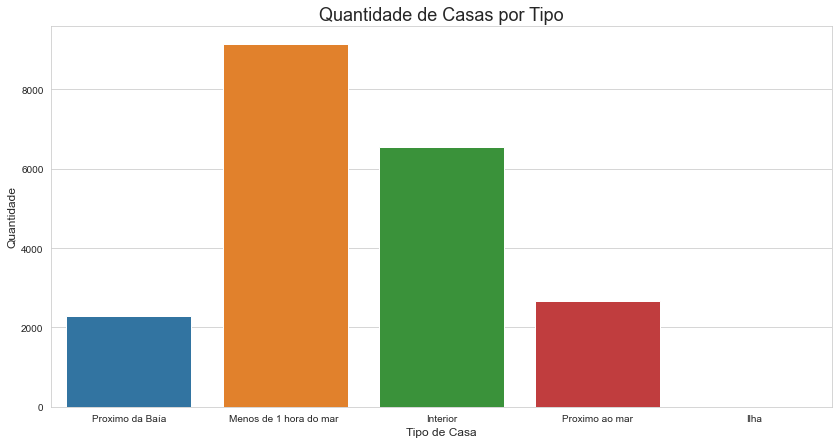

In [5]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'proximidade_do_mar', data = dados)
ax.figure.set_size_inches(14, 7)
ax.set_xlabel('Tipo de Casa', fontsize = 12)
ax.set_ylabel('Quantidade', fontsize = 12)
ax.set_title('Quantidade de Casas por Tipo', fontsize = 18)
ax = ax

# Valor Geral das Casas

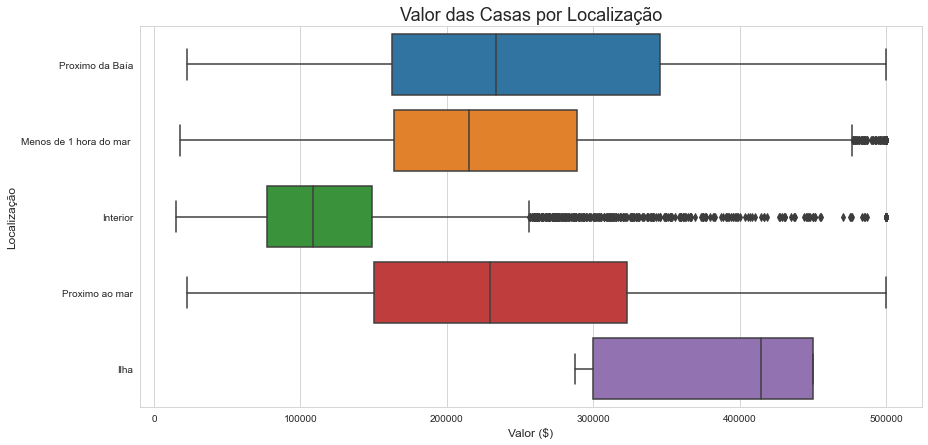

In [6]:
sns.set_style('whitegrid')
ax = sns.boxplot(x= 'valor_medio_das_casas', y = 'proximidade_do_mar', data = dados)
ax.figure.set_size_inches(14, 7)
ax.set_xlabel('Valor ($)', fontsize = 12)
ax.set_ylabel('Localização', fontsize = 12)
ax.set_title('Valor das Casas por Localização', fontsize = 18)
ax = ax

### O valor médio das casas no interior é inferior aos outros tipos de casas e as casas de ilha tem seu valor muito superior ao restante das casas

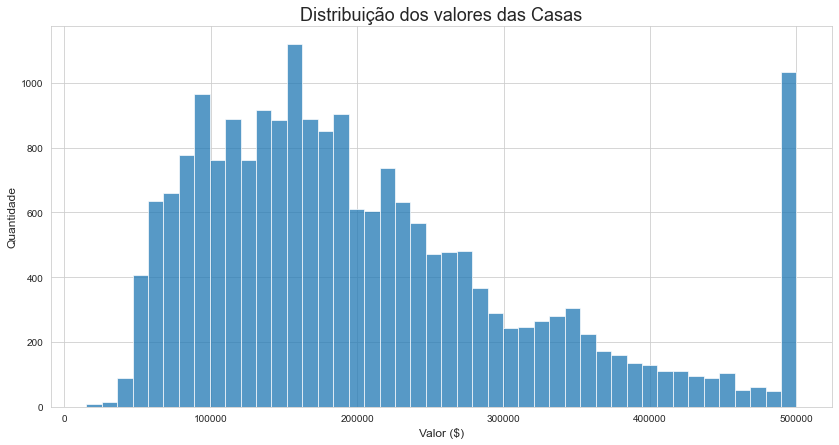

In [7]:
ax = sns.histplot(dados.valor_medio_das_casas, kde = False)
ax.figure.set_size_inches(14, 7)
ax.set_xlabel('Valor ($)', fontsize = 12)
ax.set_ylabel('Quantidade', fontsize = 12)
ax.set_title('Distribuição dos valores das Casas', fontsize = 18)
ax = ax

### A maioria das casas tem seu valor entre 100.000 e 200.000, porém chama a atenção a quantidade de casas no valor de 500.000 

# Valor médio das casas por localização

In [8]:
localizacao = dados.groupby('proximidade_do_mar')
localizacao = localizacao.mean().round(2).sort_values('valor_medio_das_casas', ascending= False)

In [9]:
localizacao['tamanho_familias'] = ((localizacao.populacao) / (localizacao.familias)).round(2)
localizacao

,idade,tamanho_sala,tamanho_quarto,populacao,familias,renda_media,valor_medio_das_casas,tamanho_familias
proximidade_do_mar,,,,,,,,
Ilha,42.40,1574.60,420.40,668.00,276.60,2.74,380440.00,2.42
Proximo da Baía,37.73,2493.59,514.18,1230.32,488.62,4.17,259212.31,2.52
Proximo ao mar,29.35,2583.70,538.62,1354.01,501.24,4.01,249433.98,2.70
Menos de 1 hora do mar,29.28,2628.34,546.54,1520.29,517.74,4.23,240084.29,2.94
Interior,24.27,2717.74,533.88,1391.05,477.45,3.21,124805.39,2.91


# Renda Média por Tipo de Casa

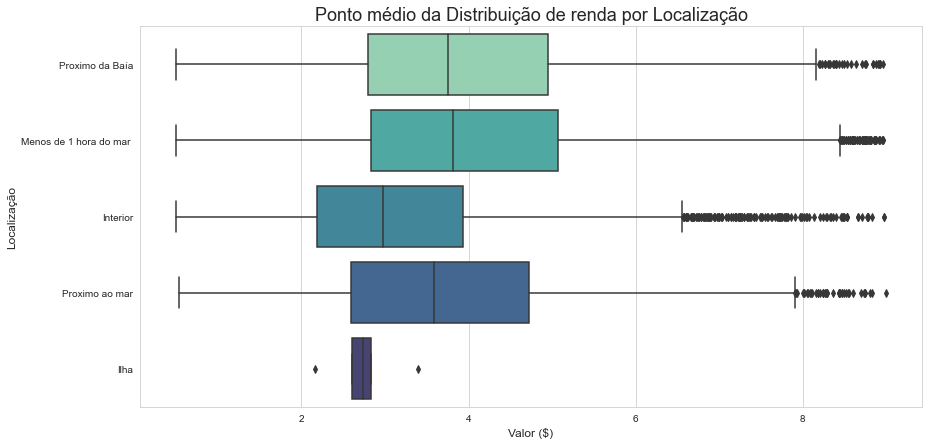

In [10]:
sns.set_palette('mako_r')
ax = sns.boxplot(x= 'renda_media', y = 'proximidade_do_mar', data = dados.query('renda_media < 9'))
ax.figure.set_size_inches(14, 7)
ax.set_xlabel('Valor ($)', fontsize = 12)
ax.set_ylabel('Localização', fontsize = 12)
ax.set_title('Ponto médio da Distribuição de renda por Localização', fontsize = 18)
ax = ax

# Idade das Casas

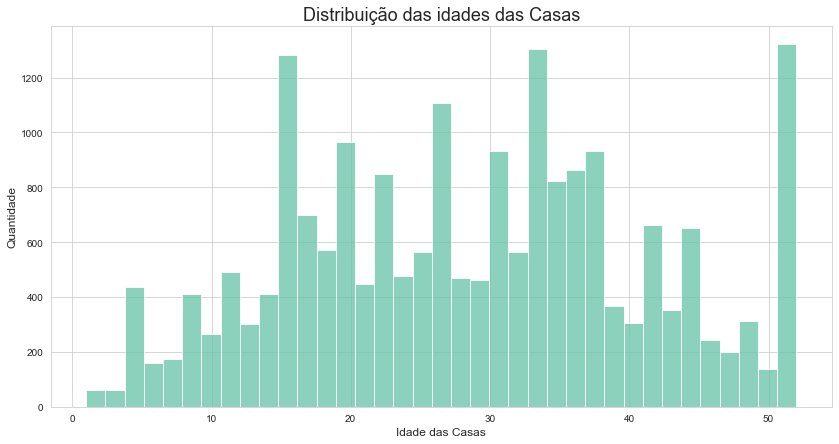

In [11]:
sns.set_palette('Set2')
ax = sns.histplot(dados['idade'])
ax.figure.set_size_inches(14, 7)
ax.set_xlabel('Idade das Casas', fontsize = 12)
ax.set_ylabel('Quantidade', fontsize = 12)
ax.set_title('Distribuição das idades das Casas', fontsize = 18)
ax = ax

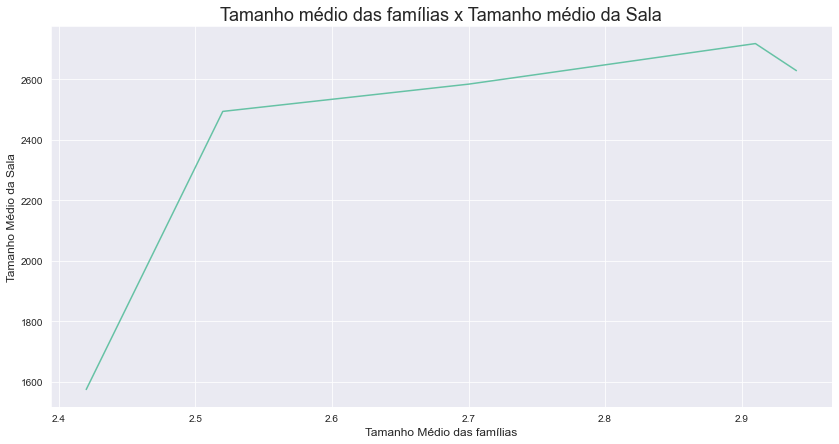

In [12]:
sns.set_style('darkgrid')
ax= sns.lineplot(x = 'tamanho_familias', y = 'tamanho_sala', data = localizacao, markers= True)
ax.figure.set_size_inches(14, 7)
ax.set_xlabel('Tamanho Médio das famílias', fontsize = 12)
ax.set_ylabel('Tamanho Médio da Sala', fontsize = 12)
ax.set_title('Tamanho médio das famílias x Tamanho médio da Sala', fontsize = 18)
ax = ax